<span style="color:LightSkyBlue;font-weight:700;font-size:20px">
      MACHINE LEARNING REPORT ON THE CAR SALE ADVERTS
</span>


| TITLE |Machine Learning Concepts
|-------|------|
| NAME  |GODWIN AJAYI 
|       |      |
| COURSE CODE| 6G7V0015|
|       |    |
| ID    |22553197|

<p style="text-align:center;">
    <img src="AUTO TRADERRR.png"
         alt="Logo"
         width="400"
         height="50"

# This is a coursework on the principles of data science

#### **About the dataset**
The Data set is from Auto Trader

Auto Trader prides itself on being the most trusted automotive marketplace. It’s the go-to destination for car buyers and has been for the past 40 years.

Auto Trader has over 90% prompted brand awareness with consumers and attracts over 50 million cross platform visits each month. The audience is not only large but highly engaged with a 75% share of minutes spent across automotive platforms.

# <u> **Import required libraries**<u>

In [1]:
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
!pip install pandas-profiling --quiet
!pip install phik==0.11.1 --quiet
!pip install missingno --quiet

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## <u>**Reading the data into python**<U>

In [2]:
adverts = pd.read_csv("C:/Users/USER/Downloads/adverts.csv")

### **1. Data Understanding and Exploration**

The dataset contains collections of adverts with information on vehicles such as brand type, model, colour, mileage as well as the selling price.

#### Basic Data Exploration


This step is performed to guage the overall data. The volume of data, the types of columns present in the data.

There are four commands which are used for Basic data exploration in Python

- head() : This helps to see a few sample rows of the data
- info() : This provides the summarized information of the data
- describe() : This provides the descriptive statistical details of the data
- nunique(): This helps us to identify if a column is categorical or continuous

In [3]:
adverts.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [4]:
adverts.nunique()

public_reference         402005
mileage                   80634
reg_code                     72
standard_colour              22
standard_make               110
standard_model             1168
vehicle_condition             2
year_of_registration         84
price                     30578
body_type                    16
crossover_car_and_van         2
fuel_type                     9
dtype: int64

- Summary of data: 402005 rows, 12 columns

## <u> Looking at the distribution of Target variable<u>

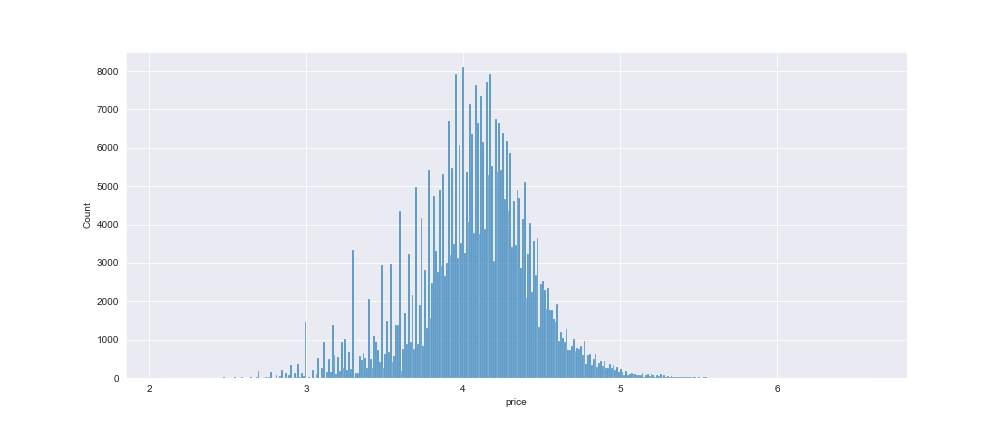

> We can remove the skewness of a random variable by transforming it with log transformation. In this case, i've applied log transformation to make price distribution look normal

The data distribution of the target variable is satisfactory to proceed further

## <u>**1.1. Meaning and Type of Features**<u>

#### Data description

- Price: The Price of the cars. This is the Target Variable!
- mileage: aggregate length or distance in miles: such as. : the total miles traveled especially in a given period of time.
- reg code: The unique registration code for each cars
- Year of registration: The year the car was registered
- Standard make refers to the brand of the vehicle.
- Standard model refers to the specific vehicle model. Using the example of a Nissan Altima, Nissan is the make, while Altima is the model. ATV/UTV. 
- vehicle_condition: this is the condition of the vehicle, with the value USED indicating that the vehicle is pre-owned.
- Fuel type: The type of fuel the car uses
- Body type: A car body type is a categorisation of a vehicle based on its design, shape and space.
- crossover_car_and_van: this is a boolean field that indicates whether the vehicle is a crossover between a car and a van.

<table ><tr><th>Columns <th><th> Dtype<tr><tr>
<tr><td> public reference <td><td> int64<td><tr>
<tr><td> mileage <td><td> float64<td><tr>
<tr><td> reg_code <td><td> object<td><tr>
<tr><td> standard_colour <td><td> object<td><tr>
<tr><td> standard_model<td><td> object<td><tr>
<tr><td> standard_make <td><td> object<td><tr>
<tr><td> vehicle_condition <td><td> object<td><tr>
<tr><td> year_of_registration <td><td> float64<td><tr>
<tr><td> price <td><td> int64<td><tr>
<tr><td> body_type <td><td> object<td><tr>
<tr><td> crossover_car_and_van <td><td> bool<td><tr>
<tr><td> fuel_type <td><td> object<td><tr>

#### **Analysis of Distributions**

Data columns that contain numerical values that can be used to measure or quantify a certain aspect of the data are referred to as quantitative columns, also known as numerical columns or continuous variables. These columns can be further classified into two groups: discrete and continuous, and they can take on any value within a continuous range.

Values that are different and distinct from one another, such as whole numbers, are contained in discrete quantitative columns. On the other hand, continuous quantitative columns, like decimal numbers, contain values that can take on any value within a continuous range.

<table ><tr><th>Quantitative columns<tr><tr>
<tr><td> public_reference <td><tr>
<tr><td> mileage <td><tr>
<tr><td> year_of_registration <td><tr>
<tr><td> price <td><tr>

####  Describe ()

<table ><tr><th><th><th>public_reference <th><th> mileage<th><th> year_of_registration<th><th> price<tr><tr>
<tr><td> count <td><td> 4.020050e+05<td><td> 401878.000000<td><td>368694.000000<td><td>4.020050e+05<td><tr>
<tr><td> mean <td><td> 2.020071e+14<td><td> 37743.595656<td><td> 2015.006206<td><td> 1.734197e+04<td><tr>
<tr><td> std <td><td> 1.691662e+10<td><td> 34831.724018<td><td> 7.962667<td><td> 4.643746e+04<td><tr>
<tr><td> min<td><td> 2.013072e+14<td><td> 0.000000<td><td> 999.000000<td><td> 1.200000e+02<td><tr>
<tr><td> 25% <td><td> 2.020090e+14<td><td> 10481.000000<td><td> 2013.000000<td><td> 7.495000e+03<td><tr>
<tr><td> 50% <td><td> 2.020093e+14<td><td> 28629.500000<td><td> 2016.000000<td><td> 1.260000e+04<td><tr>
<tr><td> 75% <td><td> 2.020102e+14<td><td> 56875.750000<td><td> 2018.000000<td><td> 2.000000e+04<td><tr>
<tr><td> max <td><td> 2.020110e+14<td><td> 999999.000000<td><td> 2020.000000<td><td> 9.999999e+06<td><tr>

Qualitative columns, also known as categorical columns are data columns that contain values that represent categories or groups. These columns can take on a limited number of possible values, and the values are usually not numerical. Qualitative columns are often used to represent characteristics or features of the data that cannot be measured or quantified numerically.

<table ><tr><th>Categorical Columns<tr><tr>
<tr><td> standard_colour <td><tr>
<tr><td> standard_make <td><tr>
<tr><td> standard_model <td><tr>
<tr><td> vehicle_condition <td><tr>
<tr><td> body_type <td><tr>
<tr><td> crossover_car_and_van <td><tr>
<tr><td> fuel_type <td><tr>

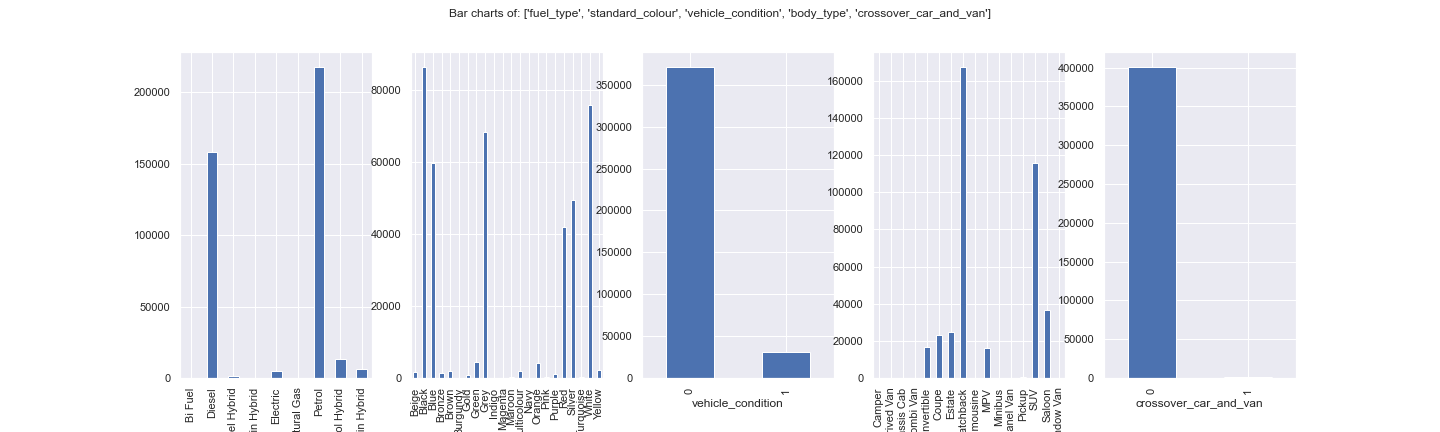

Bar charts to see how the data is distributed for these categorical columns.

#### Describe()

<table ><tr><th><th><th>standard_colour <th><th> standard_make<th><th> standard_model<th><th> vehicle_condition<th><th>body_type<th><th>crossover_car_and_van<td><td>fuel_type<tr><tr>
<tr><td>count <td><td>396627<td><td>402005<td><td>402005<td><td>402005<td><td>401168<td><td>402005<td><td>401404<td><tr>
<tr><td> unique <td><td> 22<td><td> 110<td><td> 1168<td><td> 2<td><td> 16<td><td> 2<td><td>9<td><td><tr>
<tr><td> top <td><td> Black<td><td> BMW<td><td> Golf<td><td> USED<td><td> Hatchback<td><td>False<td><td> Petrol<td><tr>
<tr><td> freq<td><td> 86287<td><td> 37376<td><td> 11583<td><td> 370756<td><td> 167315<td><td>400210<td><td>216929<td><tr>

From the above, i can see that for standard colour, the Black colour occured the most.
For Standard make, BMW comes top. For Vehicle condition, we have more of used cars and for fuel type, we have more of Petrol using cars.
For standard model, Golf occurs the highest

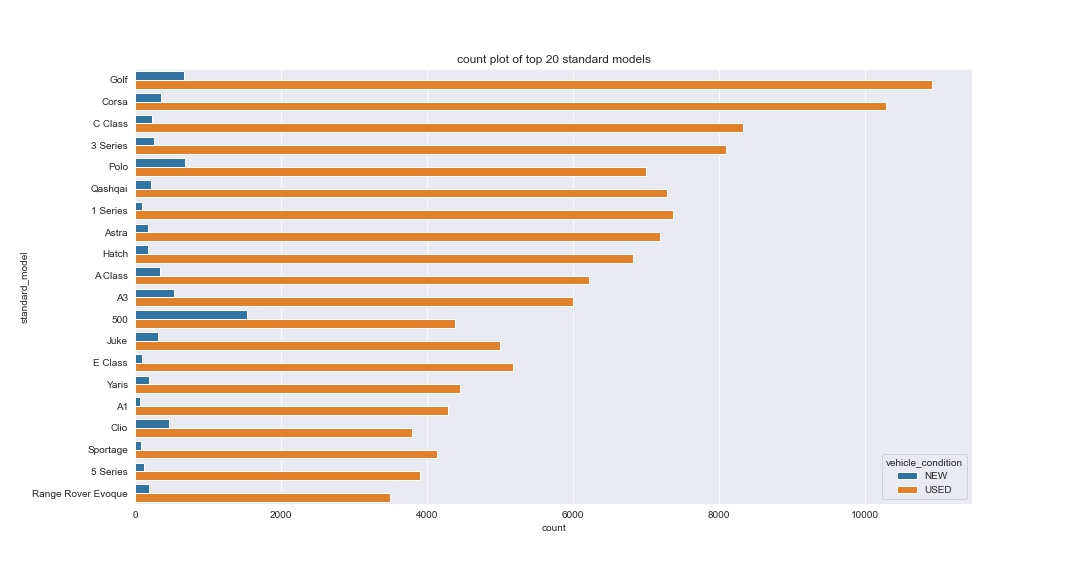

> The above plot shows us maximum adverts of cars of different models. Therefore from above plot we can see that adverts number of cars models are more from Golf Model followed by Corsa till Range Rover evoque from first 20 most of standard model

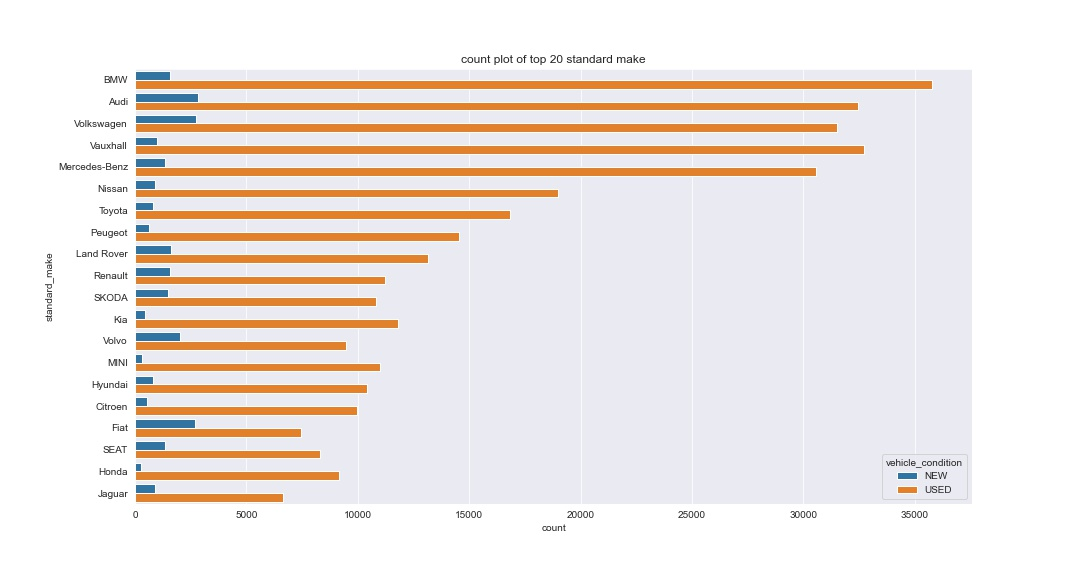

> A plot of the top 20 standard car make shows BMW comes first

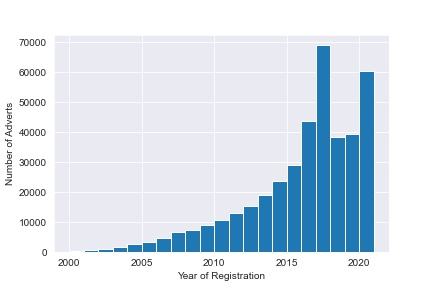

> The above plot shows us adverts of cars in respective years from about 2000 to 2021. Therefore from above plot we can see that adverts number of cars was highest in 2017.

#### ANALYSIS OF UNIVARIATE DISTRIBUTION

> The scatter plot below shows the different distributions for the price and mileage column. The extending points are outliers.

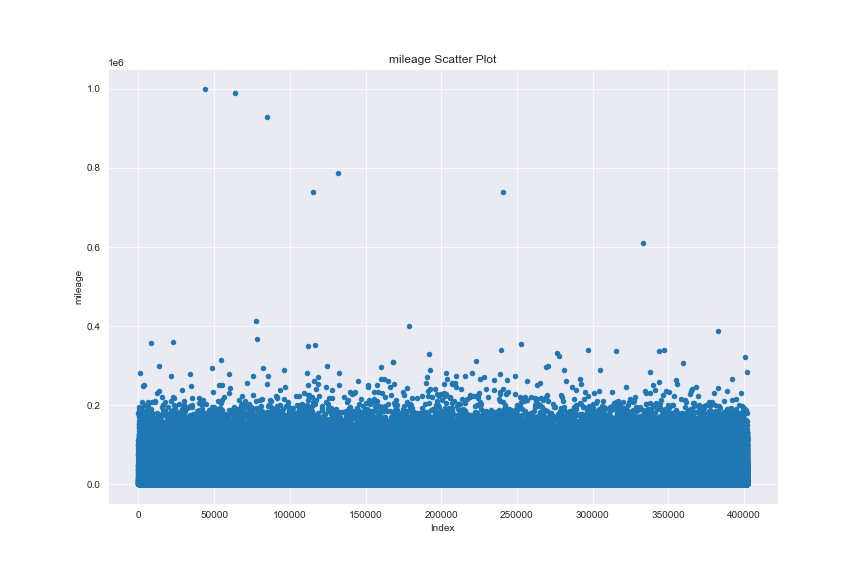

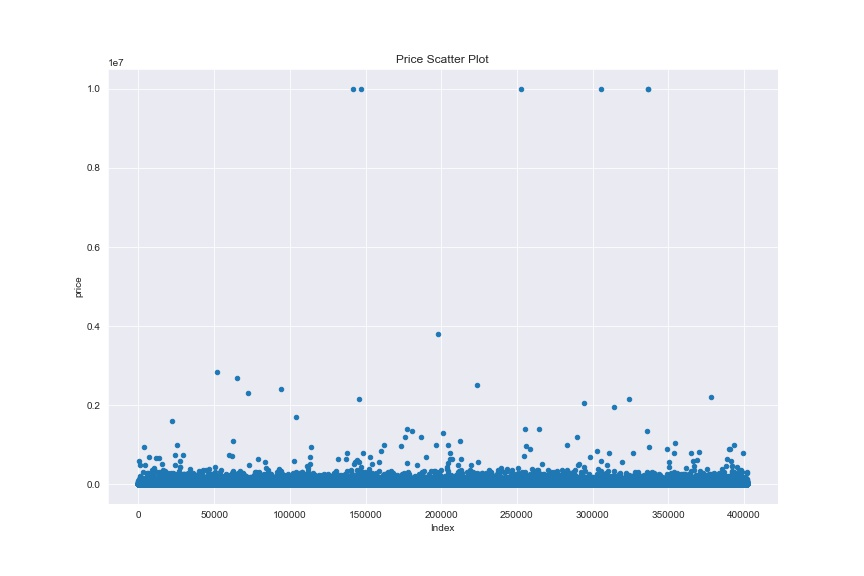

Analysis of distribution in the body_type column

> Charts shows we have more of hatchbacks in the adverts followed by SUV

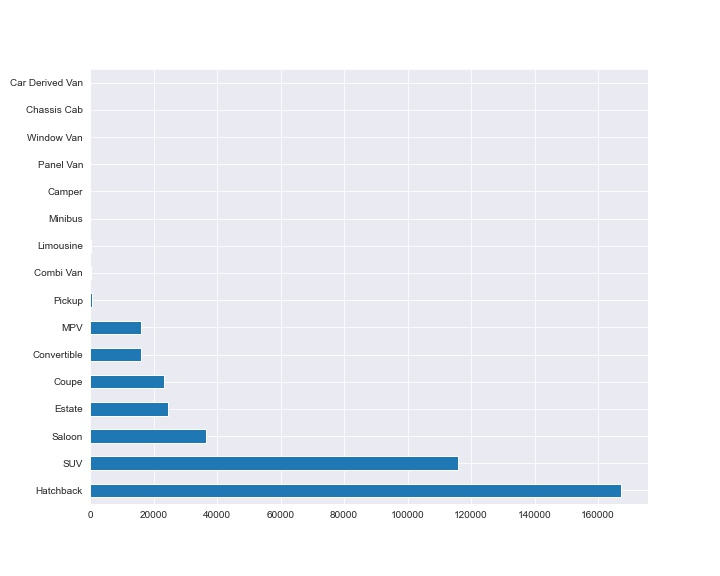

#### Analysis of Predictive Power of Features

ANOVA (Analysis of Variance) is a statistical method that can be used to examine the propensity of features in a model to predict outcomes. It is utilised to investigate the null hypothesis that the means of various groups are comparable. By comparing the means of the result variable for various levels of the feature, an ANOVA can be used to assess if a particular feature has a significant effect on the outcome variable in the context of feature selection. It is likely that the feature has a good capacity for prediction if the means for the various levels of the feature are significantly different. When features are chosen or eliminated based on their p-values. 

<table ><tr><th>COLUMNS <th><th> ANOVA RESULTS<tr><tr>
<tr><td> standard model <td><td>P-Value: 6.640052996047211e-68<td><tr>
<tr><td> standard make <td><td> P-Value: 3.879545153649509e-39<td><tr>
<tr><td> vehicle condition <td><td>P-Value: 1.1157287635872366e-28<td><tr>
<tr><td> body type <td><td>P-Value: 1.514409583672064e-40<td><tr>
<tr><td> fuel_type <td><td>P-Value: 4.856296225271252e-16<td><tr>
<tr><td> standard colour <td><td> P-Value: 0.0373904421915285<td><tr>
<tr><td> crossover_car_and_van <td><td> P-Value: 0.16184389635027194<td><tr>

The standard model, standard make, vehicle condition, body style, and fuel type all seem to be connected with the price of the car, according to the ANOVA results. This indicates that these factors affect the vehicle's pricing in a statistically significant way. However, as the p-value is higher than the 0.05 cutoff, it does not appear that the crossover car and van group has a statistically significant effect on the cost of the vehicle. It's important to note that the standard colour category also has a high p-value, indicating that while it may have some influence on the pricing, it is not as powerful as the other predictors found by the study.

- Overall, these results suggest that these identified categorical variables should be included in the model as they have a statistically significant impact on the price of a vehicle.

##### Random Forest Feature Importance

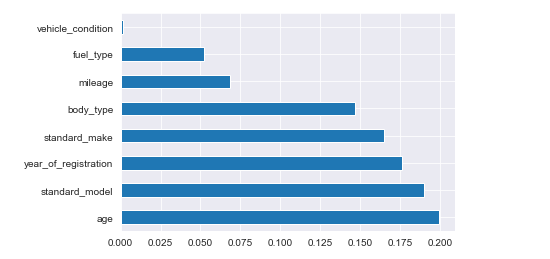

> This also Analyses the predictive power of features.

### **1.2. Identification/Commenting on Missing Values**

<table ><tr><th>Columns <th><th> No of missing values<tr><tr>
<tr><td> mileage <td><td> 127<td><tr>
<tr><td> reg_code <td><td> 31857<td><tr>
<tr><td> standard_colour <td><td> 5378<td><tr>
<tr><td> year_of_registration <td><td> 33311<td><tr>
<tr><td> body_type <td><td> 837<td><tr>
<tr><td> fuel_type <td><td> 601<td><tr>

We cannot Ignore the missing values, because the percentage of missing values is not small and the missing values are not randomly distributed throughout the dataset.
Ignoring may introduce bias into  results as the missing values are not truly random.

- Visual representation of the missing data in the dataset

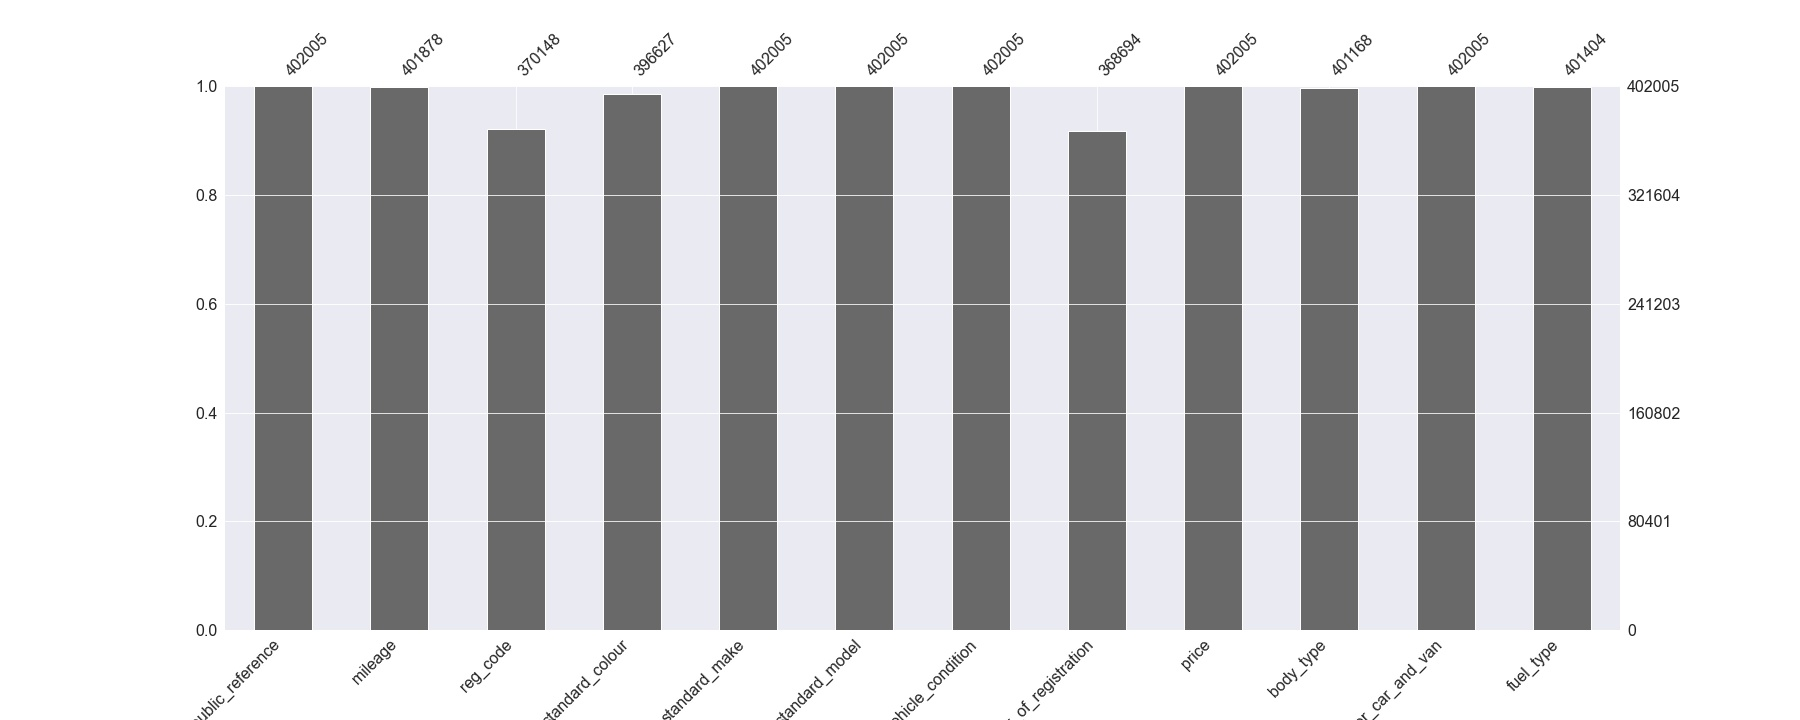

### <u> **1.3. Identification/Commenting on Outliers and Noise**<u>

Outliers are extreme values in the data which are far away from most of the values. 

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

- scatter plots to identify outliers.

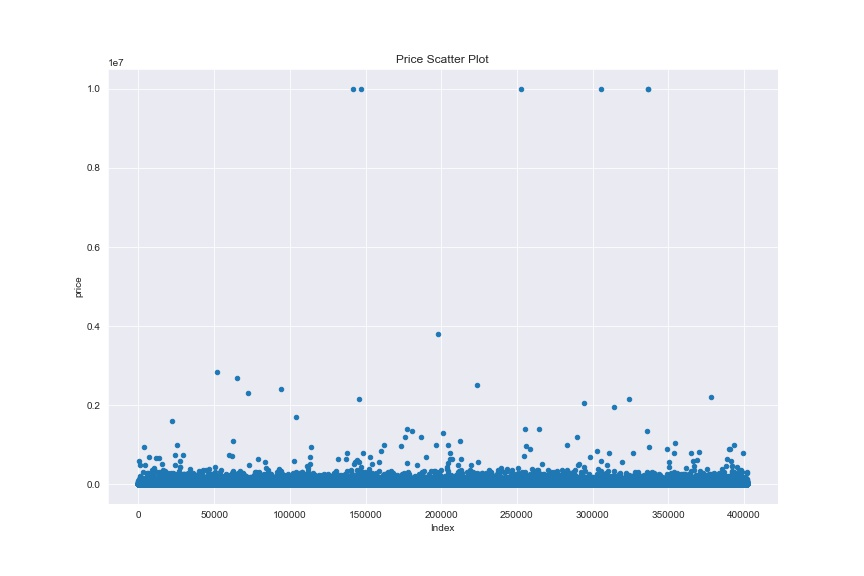

There are a number of factors that could contribute to outliers in the price of cars in this dataset. Some possible explanations include:

- The cost of new autos can be greater.
- The automobile's brand and model: Some car brands and models may be more well-liked or in high demand, which could lead to a price increase.
- The car's options and features: Cars with more options or features may cost more than those with fewer options or features.
- The location of the automobile's sale: Depending on the local economy or the demand for particular car models, the price of a car may fluctuate depending on the location where it is being sold.
- The seller: The seller may have an impact on a car's price.
- Pricing errors or mistakes: Outliers in price may be the result of pricing errors or mistakes, such as if the price listed is significantly higher or lower than the typical price for that make and model of car.

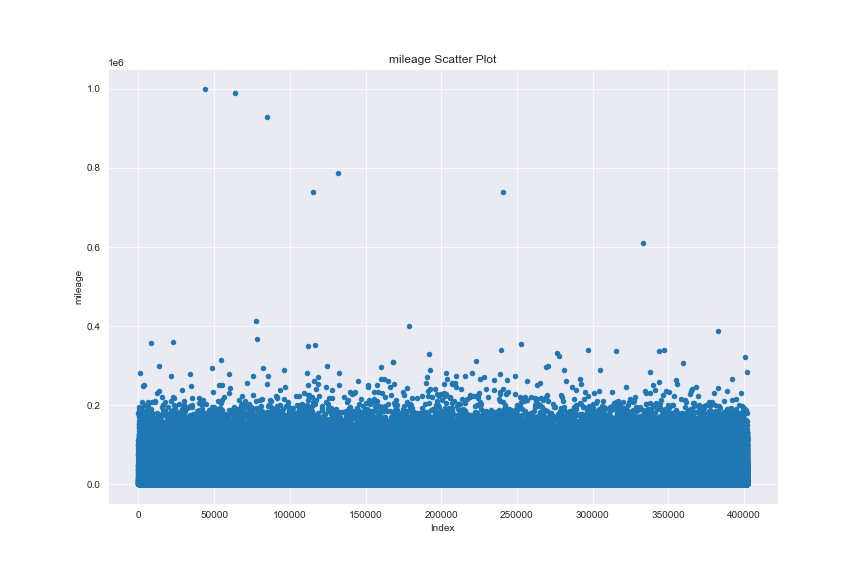

Outliers in mileage data may occur for a variety of reasons. Some possible explanations for outliers in mileage include:

- Due to factors like the owner's driving habits or the car's use, the vehicle may have been driven much more or less than the average vehicle (e.g. for commuting or for long distance travel).
- Higher mileage could be the result of the vehicle being operated in a way that was particularly difficult on the engine or other parts.
- The vehicle's mileage may have been omitted or erroneously recorded.

## <u>**2. Data Processing for Machine Learning**<u>

### **2.1. Dealing with Missing Values, Outliers, and Noise**

<table ><tr><th>Columns <th><th> No of missing values<tr><tr>
<tr><td> mileage <td><td> 127<td><tr>
<tr><td> reg_code <td><td> 31857<td><tr>
<tr><td> standard_colour <td><td> 5378<td><tr>
<tr><td> year_of_registration <td><td> 33311<td><tr>
<tr><td> body_type <td><td> 837<td><tr>
<tr><td> fuel_type <td><td> 601<td><tr>

#### Missing values are treated for each column separately.

- **Filling missing values in the standard_colour column**

| Standard_colour       |
|:------------|
| Grey        |
| Blue        |
| Brown       |
| Red         |
| Bronze      |
| Black       |
| White       |
| Silver      |
| Purple      |
| Green       |
| Orange      |
| Yellow      |
| Turquoise   |
| Gold        |
| Multicolour |
| Beige       |
| Burgundy    |
| Pink        |
| Maroon      |
| Magenta     |
| Navy        |
| Indigo      |

> The above are the unique values in the standard colour column after filling Nans

For each group of rows in the DataFrame that have the same values in the standard make and standard model columns, the missing values are filled in using the mode of the standard colour column. The standard make and standard model columns of the DataFrame are first grouped, and for each group, the mode of the standard colour column is computed. The first non-null value in the mode is utilised as the mode value if there are any. If the mode value is not null, it is then utilised to fill in the blanks in the datafram's standard colour column. The changed dataframe is then given back.

- **Filling missing values in the body_type column**

I used a function to fill the nans in the body_type column. The function groups the dataframe by standard_make, and for each group, it computes the mode of the body_type column. It then selects only the non-null values in the mode and uses the first one as the mode value. If the mode value is not null, the function fills null values in the body_type column with the computed mode. Finally, the function returns the modified dataframe.

|    | body_types_unique_val   |
|---:|:------------------------|
|  0 | SUV                     |
|  1 | Saloon                  |
|  2 | Hatchback               |
|  3 | Convertible             |
|  4 | Limousine               |
|  5 | Estate                  |
|  6 | MPV                     |
|  7 | Coupe                   |
|  8 | Pickup                  |
|  9 | Combi Van               |
| 10 | Panel Van               |
| 11 | Minibus                 |
| 12 | Window Van              |
| 13 | Camper                  |
| 14 | Car Derived Van         |
| 15 | Chassis Cab             |

### **<u> Filling missing values in the fuel_type column<u>**

The mode value (i.e., the most frequently occurring value) in the fuel type column is used to fill the Nans

 >#### The year of registration had values that were  wrongly inputed to assume. I created a dictionary to replace them all with appropriate values

<table ><tr><th>Original <th><th> Replacement<tr><tr>
<tr><td> 999<td><td> 1999<td><tr>
<tr><td> 1006 <td><td> 2006<td><tr>
<tr><td> 1007<td><td> 2007<td><tr>
<tr><td> 1008 <td><td> 2008<td><tr>
<tr><td> 1009 <td><td> 2009<td><tr>
<tr><td> 1010 <td><td> 2010<td><tr>
<tr><td> 1015 <td><td> 2015<td><tr>
<tr><td> 1016 <td><td> 2016<td><tr>
<tr><td> 1017 <td><td> 2017<td><tr>
<tr><td> 1018 <td><td> 2018<td><tr>
<tr><td> 1063 <td><td> 1963<td><tr>
<tr><td> 1515 <td><td> 2015<td><tr>
<tr><td> 1909 <td><td> 1999<td><tr>
<tr><td> 1933 <td><td> 1953<td><tr>





### **<u> Filling missing values in the year_of_registration column<u>**

An assumption is made here, that for vehicle that are new, and the year of registration and regcode values are Nan, the year of registration is 2021 and the corresponding reg_code value is assigned. 
So, the function below is used to fill

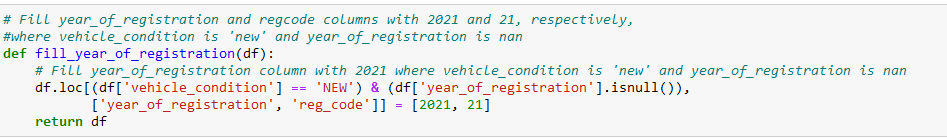

#### **I loaded the  Car year identifier and age identifier csv file into my notebook in my quest to fill the remaining Nans in my year of registration column**

> Two dictionaries were created from the data in the age_identifier dataframe and then using those dictionaries to fill missing values in the year_of_registration column 

The code is filling missing values in the year_of_registration column of the adverts DataFrame by using two dictionaries that are created from the age_identifier DataFrame and the reg_code column of the adverts data frame

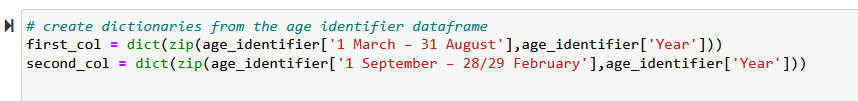

#### **I created another dictionary by using the zip() function and two columns from the Pandas DataFrame year_identifier. The dictionary maps the values in the 'Letter' column to the corresponding values in the 'Year' column for rows 21 to 41 of the DataFrame.**

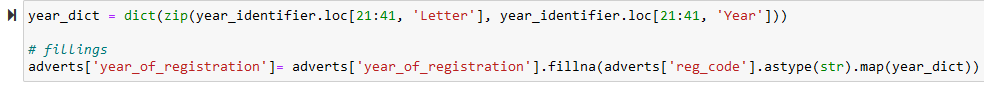

<table ><tr><th>Columns <th><th> No of missing values<tr><tr>
<tr><td> year_of_registration <td><td> 330<td><tr>


Checking, i still have my number of missing values in the year of registration column as 330

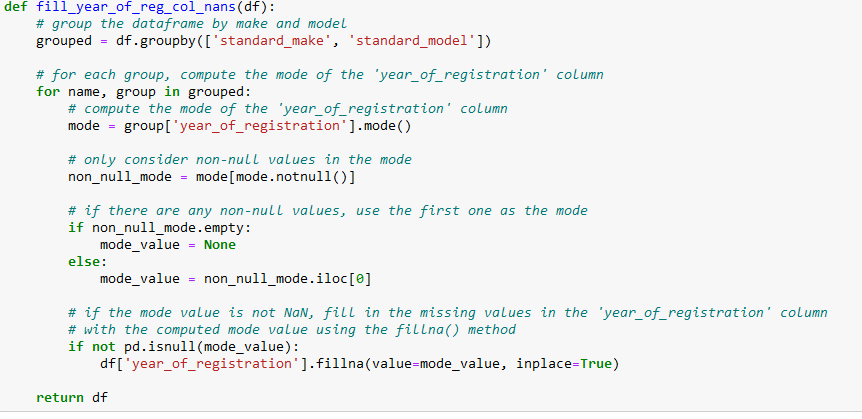

> The function works by grouping  standard_make and standard_model, and then for each group, it computes the mode of the year_of_registration column. If there are no non-null values in the mode, the mode value is set to None. If there are any non-null values, the first one is used as the mode value. Finally, the function uses the fillna() method to fill in the missing values in the year_of_registration column with the computed mode value, if the mode value is not NaN.

#### **<u> Filling missing values in the mileage column<u>**

> The missing values in the mileage column is filled with median of the column

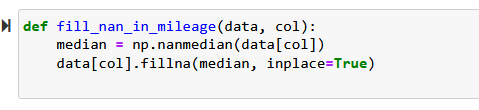

#### **<u>Dealing with the Nans in the Regcode column<u>**

> I will drop my reg_code columnn because it will serve the same function as the year_of_registration in the dataset

#### **<u>Treating outliers in the price and mileage column<u>**
**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value

**Finding out the most logical value to be replaced in place of outliers**

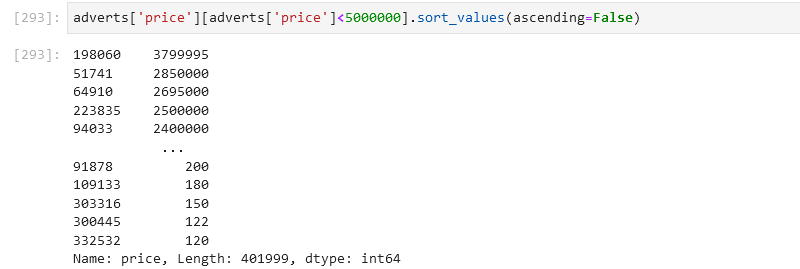

Based on the above output, the nearest logical value is 3799995, hence, replacing any value greater than 5000000£ with 4000000£

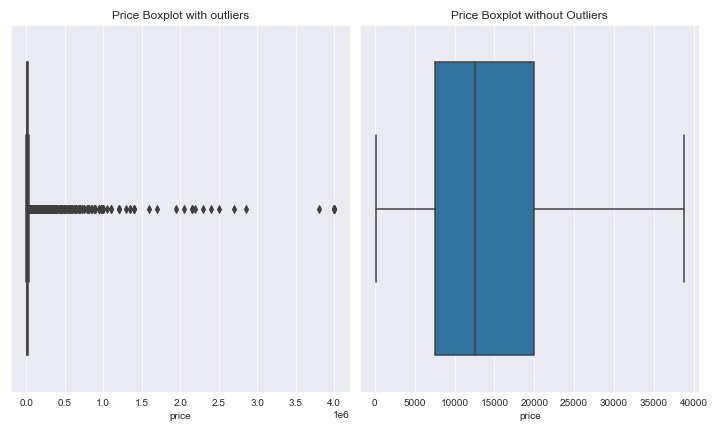

#### I proceeded to remove treat the outliers in price using the quartile range 0.90

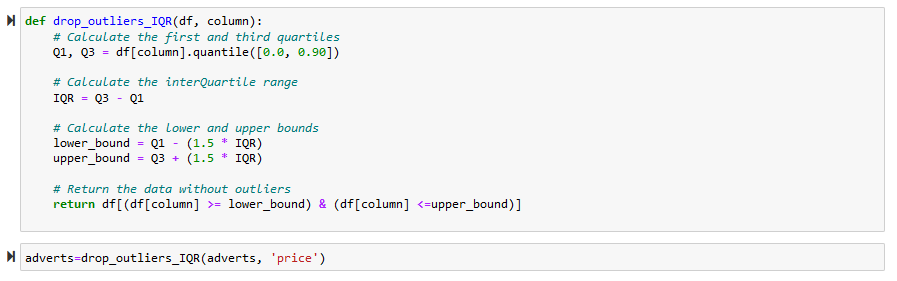

#### **<u>Mileage<u>**

I used 200,000 as my logical value for mileage.

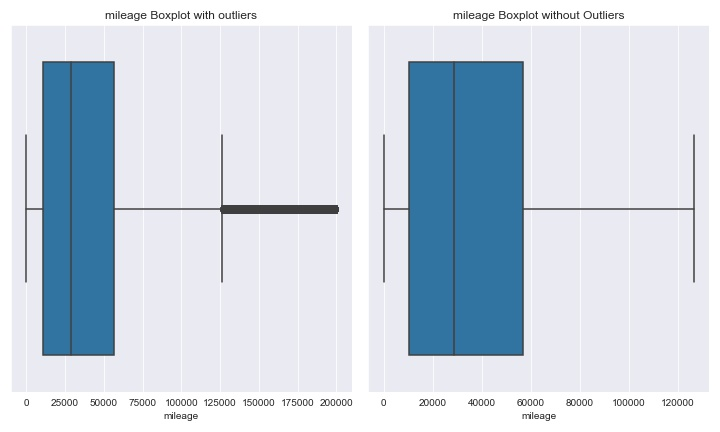

## **2.2. Feature Engineering, Data Transformations (2-3)**

#### 1. AGE:
Age of a car is calculated as (current year- year of registration)
- Current year is set to 2021 as that is the max year in the year of registration column

<table ><tr><th>year_of_registration <th><th> age<tr><tr>
<tr><td> 2011 <td><td> 10<td><tr>
<tr><td> 2017 <td><td> 4<td><tr>
<tr><td> 2016 <td><td> 5<td><tr>
<tr><td> 2015 <td><td> 6<td><tr>


> This gives us the age of the vehicle as a new column

### **Data transformation**

- Data transformation on the vehicle condition column and crossover_car_and_van column

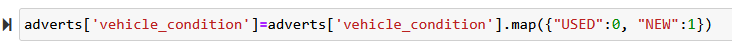

<table ><tr><th>Vehicle_condition <th><th> crossover_car_and_van<tr><tr>
<tr><td> 1 <td><td> 0<td><tr>
<tr><td> 0 <td><td> 0<td><tr>
<tr><td> 0 <td><td> 0<td><tr>
<tr><td> 0 <td><td> 0<td><tr>
<tr><td> 0 <td><td> 0<td><tr>
<tr><td> 0 <td><td> 0<td><tr>

> #### This will return a transformed column with numeric values for the condition 'USED', and 'NEW' same thing applies for the crossover_car_and_van column. Snippet above confirms

### Feature Selection

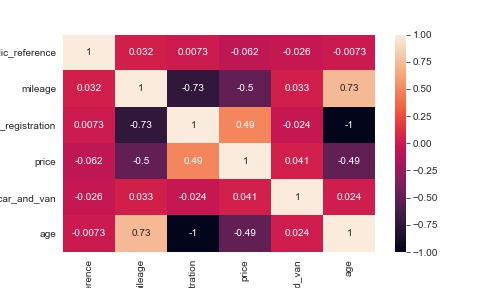

I used the correlation heat map to show correlation between numerical variable and target(price)


- From this heat map, we can conclude Mileage is correlated, same with year of registration and car age

> This confirms our correlations

<span style="color:LightSkyBlue;font-weight:500;font-size:20px">
 Analysis of variance(ANOVA) is performed to check if there is any relationship between the TARGET variable and categorical variable</span>

## If the ANOVA P-Value is <0.05, that means we reject H0

### Standard colour has the least correlation with target.

<table ><tr><th>COLUMNS <th><th> ANOVA RESULTS<tr><tr>
<tr><td> standard model <td><td>P-Value: 6.640052996047211e-68<td><tr>
<tr><td> standard make <td><td> P-Value: 3.879545153649509e-39<td><tr>
<tr><td> vehicle condition <td><td>P-Value: 1.1157287635872366e-28<td><tr>
<tr><td> body type <td><td>P-Value: 1.514409583672064e-40<td><tr>
<tr><td> fuel_type <td><td>P-Value: 4.856296225271252e-16<td><tr>
<tr><td> standard colour <td><td> P-Value: 0.0373904421915285<td><tr>
<tr><td> crossover_car_and_van <td><td> P-Value: 0.16184389635027194<td><tr>

<table ><tr><th>Correlated Columns<tr><tr>
<tr><td> standard_make <td><tr>
<tr><td> standard_model <td><tr>
<tr><td> vehicle_condition <td><tr>
<tr><td> body_type <td><tr>
<tr><td> fuel_type <td><tr>
<tr><td> standard colour  <td><tr>


>- crossover _car_and_van is not correlated with price and standard colour has low correlation

###  Model Building 

- 3.1 Algorithm Selection, Model Instantiation and Configuration (1-2)

##### My base model is the Multiple linear regression and i got a low score for R2. It could be because of the following reason

- Non-linearity: MLR considers the connection between the predictor and outcome variables to be linear. If this presumption is incorrect, the model might not adequately match the data, which would lead to a poor R-squared score. 

- Overfitting is a possibility with MLR models because of their sensitivity to outliers and significant observations. On the other hand, because random forest models create many decision trees and average the predictions, they are less prone to overfitting.

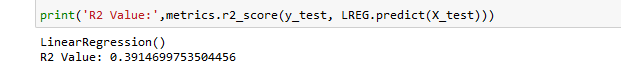

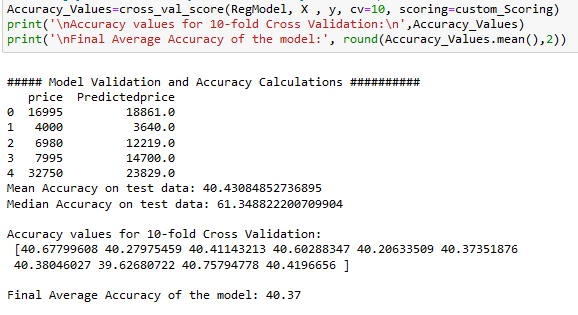

> The Final average Acccuracy of my base model is 40.37. I will compare the model with other model; Random forest and XGboost

### Random Forest

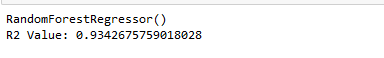

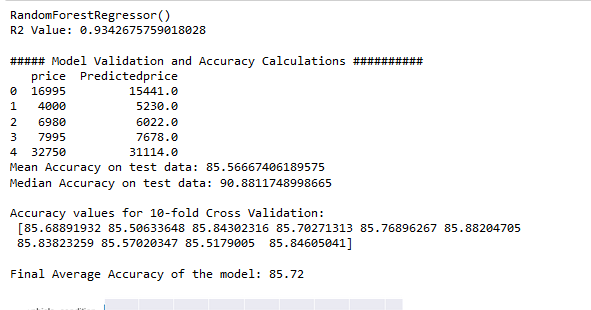

> #### A high R-squared value of 0.93 for a random forest model is generally a good indication that the model is able to explain a large amount of the variation in the target variable. 

>#### Cross-validation is done, which will give me a better estimate of the model's performance on unseen data
My cross validation score is 85.72

####  XGBOOST

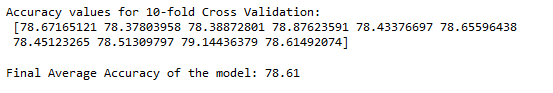

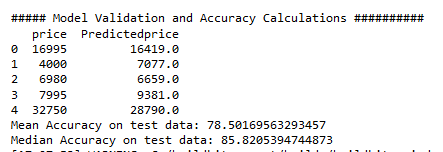

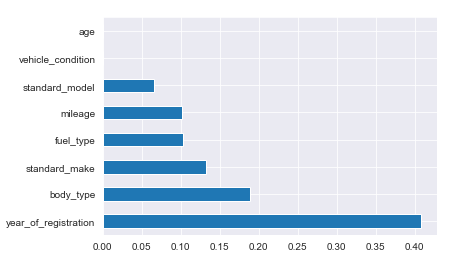

> The model might not be as intricate as the random forest, and as a result, it could not be able to account for as much variation in the target variable.

#### 3.2. Grid Search, and Model Ranking and Selection

> #### GRID SEARCH ON RANDOM FOREST

A grid search using a Random Forest Regressor model to optimize the parameters of the model. It's using R2 score as the evaluation metric, which is a commonly used metric to evaluate the performance of regression models.

The grid search is searching through two parameters: 'max_depth' and 'n_estimators'. The possible values for 'max_depth' are [5, 10, 15], and the possible values for 'n_estimators' are [50, 100]. The grid search trainS a Random Forest model for each combination of these parameters and evaluate the model's performance using R2 score.

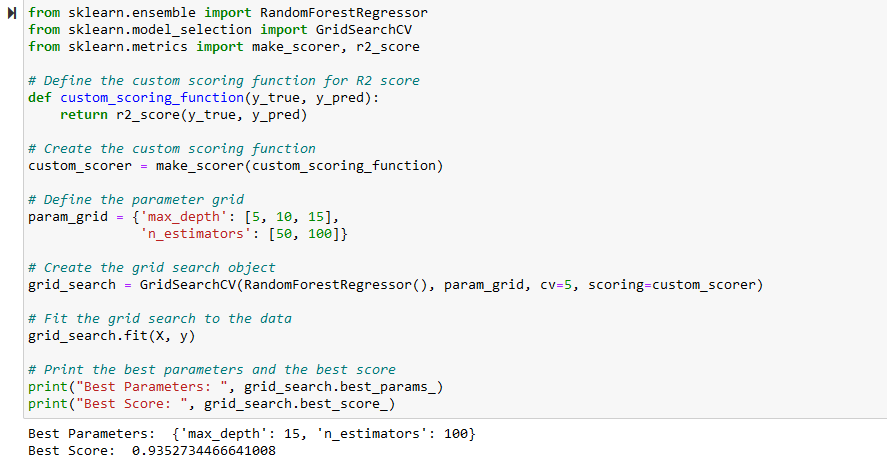

> The grid search was done on just random forest because of the computational power of my computer.

#### Model ranking and selection

Model ranking and selection is the process of comparing different machine learning models and selecting the best one based on their performance

- My best model here is the Random forest after the grid search i still have a high r2 score of 0.9352734466641008.
- The Knn is doing well also. but the Final Average Accuracy of my random forest model supercedes my knn model. 

Final Average Accuracy of the model: 85.72(Random Forest)
Final Average Accuracy of the model: 84.83(KNN)

### 4. Model Evaluation and Analysis

- ####  4.1. Coarse-Grained Evaluation/Analysis (1-2) (e.g., with model scores)

- The grid search is a coarse-grained evaluation method

<table ><tr><th>Coarse-Grained Evaluation<th><th> R2 SCORE AFTER GRID SEARCH<tr><tr>
<tr><td> Random Forest Regressor <td><td>0.9352734466641008 <td><tr>

Based on the results of the grid search, it appears that the best set of parameters for the random forest model is a max_depth of 15 and n_estimators of 100. This combination of parameters resulted in an R2 score of 0.94, which is considered to be a high value and indicates that the model is able to explain 93% of the variability in the target variable.

It is worth noting that the R2 score is a commonly used metric for evaluating the performance of regression models, and values close to 1 indicate that the model is able to accurately predict the target variable. A high R2 score such as 0.93 indicates that the model is able to make accurate predictions, and that the difference between the predicted values and the true values of the target variable is small.

| Metric        | Value          |
| ------------- |----------------|
| Mean Accuracy | 85.56696472307145 |
| Median Accuracy | 90.8868778280543  |


- It is worth noting that these metrics are calculated using the absolute percentage error (APE) and they are affected by outliers sometimes

- In conclusion, the model has a Mean Accuracy of 85.57% and a Median Accuracy of 90.89%. These values suggest that the model is making accurate predictions

- #### 4.2. Feature Importance

>  A FEATURE IMPORTANCE PLOT FROM RANDOM FOREST

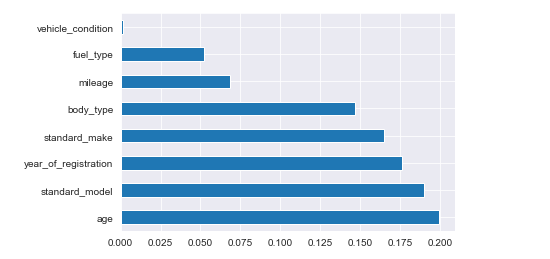

The age of the car and its standard model are the two factors that have the most impact on a car's price, as indicated by the feature importance plot. The feature importance plot, which the random forest model creates, displays the relative weights each feature has in affecting the target variable.

The car's age is the most crucial component because it has the greatest feature priority score. This shows that there is a significant relationship between the age of the car and its price. It makes sense that older vehicles would cost less than newer ones. 
- The second most crucial element is the car's standard model, which has a high relevance value.

- Standard make also has a relatively high importance value, though not as high as age and standard model. This suggests that the make of the car also has some influence on the price of the car. This is also intuitive as different car makers tend to have different prices for their cars.

>  A Feature importance plot from Xgboost

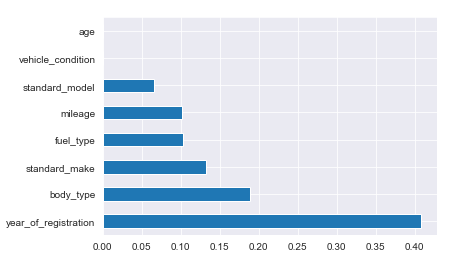

The Xg boost has got different features as its best, different from the random forest feature importance plot. The Year of registration comes first here

The year of registration can influence car prices, as the age of the car is one of the key factors that determine the price of a used car. Generally, newer cars will have a higher price than older cars. This is because newer cars typically have lower mileage, have been subject to fewer repairs, and have a more modern design. Additionally, cars that are newer are likely to be equipped with more advanced safety features and technologies, which can also affect their price.

- #### Fine-Grained Evaluation (1-2) (e.g., with instance-level errors)

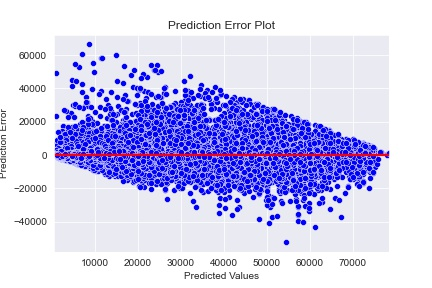

In the prediction error plot, the line that runs through the middle of the points (y=0) represents the average difference between the predicted values and the true values. If the points are randomly distributed around this line, it means that the model is making accurate predictions on average.

In this case, since the line runs through the middle of the points, it indicates that the model is making accurate predictions on average. This is a good indication that the model is performing well.

## **CONCLUSION**

Due to the fact that i removed outliers in price using the 90% percentile,. my models will not be able to predict price of cars in that range. And Random forest seems very much my best model here. It's accuracy is highest.